In [278]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

In [279]:
df = pd.read_csv("candy-data.csv")

In [280]:
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [6]:
duplicate = df[df.duplicated()]

print("Duplicated Rows:")
duplicate

Duplicated Rows:


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent


In [5]:
df.isna().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

# Data Exploration

Highest candy winpercent

In [233]:
df1=df[['competitorname','winpercent']]
df1.max()

competitorname    Whoppers
winpercent        84.18029
dtype: object

In [ ]:
df

<AxesSubplot:title={'center':'CORRELATION MAP'}>

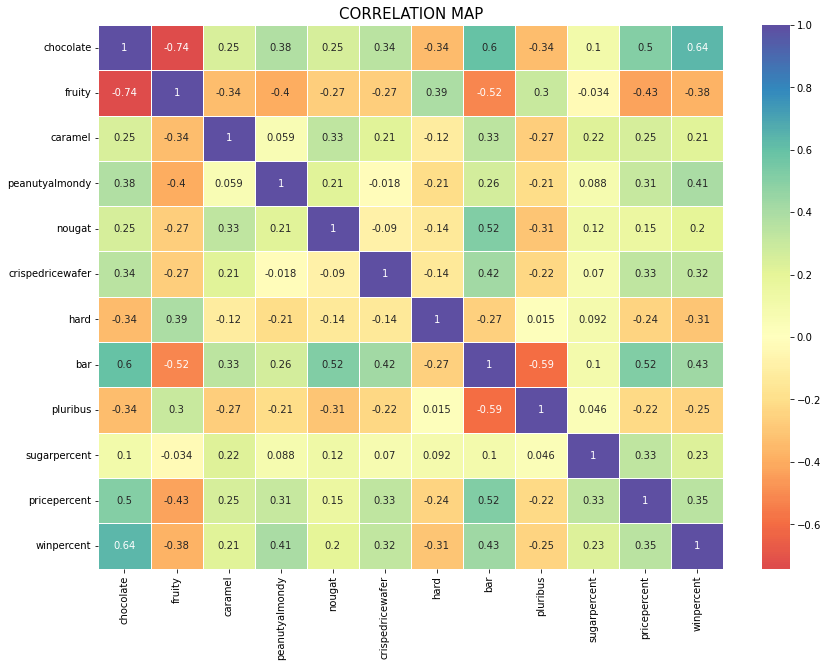

In [281]:
plt.figure(figsize=(14,10))
plt.title("CORRELATION MAP", fontsize=15)
sns.heatmap(df.corr(), linewidth=0.5, center=0, cmap="Spectral", annot=True)

In [304]:
df.groupby('chocolate')['winpercent'].sum()

chocolate
0    2022.828336
1    2254.096588
Name: winpercent, dtype: float64

In [305]:
df.groupby('fruity')['winpercent'].sum()

fruity
0    2600.374750
1    1676.550174
Name: winpercent, dtype: float64

heatmap shows 
chocolate mostly  wins correaltion with winpercent

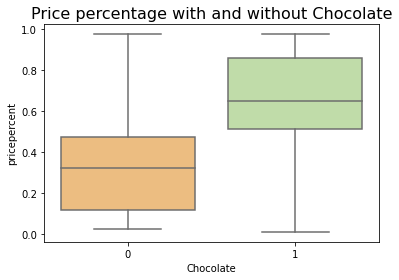

In [282]:
plt.title("Price percentage with and without Chocolate",fontsize=16)
sns.boxplot(y="pricepercent", x="chocolate", data=data, palette="Spectral")
plt.xlabel("Chocolate")
plt.show()

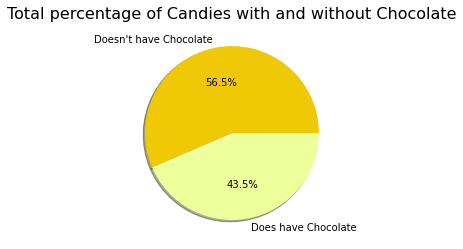

In [283]:
plt.title("Total percentage of Candies with and without Chocolate",fontsize=16)
plt.pie(data.chocolate.value_counts(), autopct='%1.1f%%',colors=["#EFC906","#ECFF9B"],labels=["Doesn't have Chocolate","Does have Chocolate"],shadow=True)

plt.show()

Top 10 winpercent always with chocolate

In [284]:
df[['competitorname', 'chocolate', 'winpercent']].sort_values('winpercent', ascending=False)[:10]

,competitorname,chocolate,winpercent
52,ReeseÕs Peanut Butter cup,1,84.180290
51,ReeseÕs Miniatures,1,81.866257
79,Twix,1,81.642914
28,Kit Kat,1,76.768600
64,Snickers,1,76.673782
53,ReeseÕs pieces,1,73.434990
36,Milky Way,1,73.099556
54,ReeseÕs stuffed with pieces,1,72.887901
32,Peanut butter M&MÕs,1,71.465050
42,Nestle Butterfinger,1,70.735641


# Predictive analytics

Split Dataset

In [295]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2)

X_train = train_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 'bar','pluribus','sugarpercent','pricepercent','winpercent']] 	
y_train = train_df["chocolate"]
X_test = test_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 'bar','pluribus','sugarpercent','pricepercent','winpercent']] 	
y_test = test_df["chocolate"]



In [296]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
preds = logreg.predict(X_test)

In [297]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[3, 4],
       [7, 3]], dtype=int64)

In [298]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[3, 4],
       [7, 3]], dtype=int64)

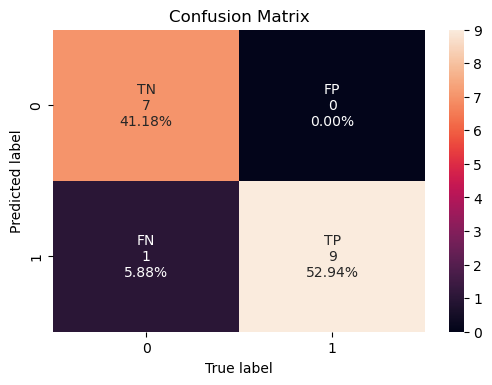

In [299]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=100)
cf = confusion_matrix(y_test, preds)
labels = ['TN','FP','FN','TP']
labels = np.asarray(labels).reshape(2,2)


group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}\n{v3}"for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


sns.heatmap(cf, annot=labels, fmt="")
plt.title('Confusion Matrix')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

In [300]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test,preds))
acc = (accuracy_score(y_test,preds))*100
print(round(acc,2),'%')

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.90      0.95        10

    accuracy                           0.94        17
   macro avg       0.94      0.95      0.94        17
weighted avg       0.95      0.94      0.94        17

94.12 %


In [302]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.35294117647058826
Precision: 0.42857142857142855


Conclusion
Chocolate wins than other features and
result from logistic regression is not stabil, need more data to get good result